# Assignment 2
## 1. Assignment2는 제가 anomaly-detection 데이터셋(캐글에 올라와있음)을 드립니다. 
이것은 해당 결제가 사기인지 아닌 지 판별하는 데이터셋이며, 실습코드를 활용하고, 또 본인이 여태 배운 내용을 활용하여 자유롭게 데
이터를 가지고 연습해주시면 됩니다. 정말 시간이 없으시면, 실습코드를 조금만 바꿔서 모델을 트레이닝하고 평
가한 결과만 보여주셔도 과제를 돌려보내지는 않겠습니다.
## 2. 다만 이 데이터셋은 굉장히 imbalance한 데이터 셋입니다. 
실제 사기를 치는 사례가 많지 않으므로 사기인 경우가 전체에 0.17프로밖에 되지 않습니다. 따라서, 그냥 데이터를 트레이닝 시키면 무조건 사기가 아니라고 판별해
버릴 가능성이 높습니다. 또한, 그대로 트레이닝을 돌리게 되면 엄청나게 많은 데이터 양 때문에 트레이닝조차
힘들 것입니다. 그런데 실제로 정확도를 높이면서 트레이닝을 할 수 있는 방법이 있으니 고민해보세요
(아마 이미 데이터 분석을 해보신분들은 imbalance라는 단어를 보자마자 답을 떠올리셨을테지만, 처음 해보시는 분
들은 고민을 해보신 뒤, 멘토분들 아무나 붙잡고 물어보시면 답을 말해줄 것입니다)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

detection = pd.read_csv('creditcard.csv',encoding='utf-8')
#데이터를 불러왔습니다. 

In [2]:
detection.info()
#데이터는 28만여개로 보입니다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
Time      284806 non-null float64
V1        284806 non-null float64
V2        284806 non-null float64
V3        284806 non-null float64
V4        284806 non-null float64
V5        284806 non-null float64
V6        284806 non-null float64
V7        284806 non-null float64
V8        284806 non-null float64
V9        284806 non-null float64
V10       284806 non-null float64
V11       284806 non-null float64
V12       284806 non-null float64
V13       284806 non-null float64
V14       284806 non-null float64
V15       284806 non-null float64
V16       284806 non-null float64
V17       284806 non-null float64
V18       284806 non-null float64
V19       284806 non-null float64
V20       284806 non-null float64
V21       284806 non-null float64
V22       284806 non-null float64
V23       284806 non-null float64
V24       284806 non-null float64
V25       284806 non-null float64
V26  

0    284314
1       492
Name: Class, dtype: int64

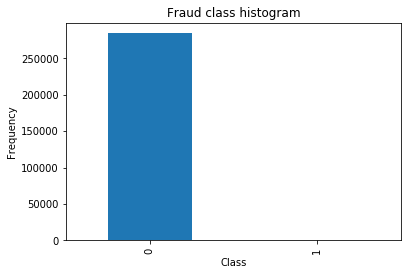

In [3]:
pd.value_counts(detection['Class']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
detection['Class'].value_counts()
#class를 확인해봤을때 0에 비하여 1인경우가 매우 적은 것으로 확인되었습니다. 

In [4]:
detection['normAmount'] = StandardScaler().fit_transform(detection['Amount'].values.reshape(-1, 1))
detection = detection.drop(['Time', 'Amount'], axis=1)
detection.head()
#샘플링을 하기전에 모든 데이터에 대해서 스케일링을 진행하였습니다. 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244966
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342472
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140536
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073401


In [5]:
def sampling_func(data, sample_pct):

    np.random.seed(123)

    N = len(data)

    sample_n = int(len(data)*sample_pct) # integer

    sample = data.take(np.random.permutation(N)[:sample_n])

    return sample

detection = detection.groupby('Class').apply(sampling_func, sample_pct=0.5)
detection.sort_index()
#데이터가 제 노트북에서 SVM을 돌리기에는 너무 많기 때문에 랜덤추출을 진행하였습니다. 이러한 방법은 데이터의 왜곡을 부를수 있을 것 같습니다.

V1        V2        V3        V4        V5        V6  \
Class                                                                      
0     0      -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
      2      -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
      3      -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
      8      -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
      9      -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
...                ...       ...       ...       ...       ...       ...   
1     275992 -2.027135 -1.131890 -1.135194  1.086963 -0.010547  0.423797   
      276864 -1.374424  2.793185 -4.346572  2.400731 -1.688433  0.111136   
      279863 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
      280143  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
      281144 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   

                    V7        V8        V9       V10  ...       V21       V22  \
Class                                                 ...                       
0     0       0.239599  0.098698  0.363787  0.090794  ... -0.018307  0.277838   
      2       0.791461  0.247676 -1.514654  0.207643  ...  0.247998  0.771679   
      3       0.237609  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274   
      8       0.370145  0.851084 -0.392048 -0.410430  ... -0.073425 -0.268092   
      9       0.651583  0.069539 -0.736727 -0.366846  ... -0.246914 -0.633753   
...                ...       ...       ...       ...  ...       ...       ...   
1     275992  3.790880 -1.155595 -0.063434  1.334414  ... -0.315105  0.575520   
      276864 -0.922038 -2.149930 -2.027474 -4.390842  ... -0.870779  0.504849   
      279863 -0.882850  0.697211 -2.064945 -5.587794  ...  0.778584 -0.319189   
      280143 -1.413170  0.248525 -1.127396 -3.232153  ...  0.370612  0.028234   
      281144 -2.208002  1.058733 -1.632333 -5.245984  ...  0.583276 -0.269209   

                   V23       V24       V25       V26       V27       V28  \
Class                                                                      
0     0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
      2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
      3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
      8      -0.204233  1.011592  0.373205 -0.384157  0.011747  0.142404   
      9      -0.120794 -0.385050 -0.069733  0.094199  0.246219  0.083076   
...                ...       ...       ...       ...       ...       ...   
1     275992  0.490842  0.756502 -0.142685 -0.602777  0.508712 -0.091646   
      276864  0.137994  0.368275  0.103137 -0.414209  0.454982  0.096711   
      279863  0.639419 -0.294885  0.537503  0.788395  0.292680  0.147968   
      280143 -0.145640 -0.081049  0.521875  0.739467  0.389152  0.186637   
      281144 -0.456108 -0.183659 -0.328168  0.606116  0.884876 -0.253700   

              Class  normAmount  
Class                            
0     0           0    0.244966  
      2           0    1.160686  
      3           0    0.140536  
      8           0    0.019394  
      9           0   -0.338514  
...             ...         ...  
1     275992      1    2.182756  
      276864      1    1.042423  
      279863      1    1.206024  
      280143      1   -0.350189  
      281144      1    0.626303  

[142403 rows x 30 columns]

In [6]:
X = np.array(detection.ix[:, detection.columns != 'Class'])
y = np.array(detection.ix[:, detection.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))
#detection을 X와 y로 나누고 그 형태에 대해서 확인하였습니다. 

Shape of X: (142403, 29)
Shape of y: (142403, 1)


C:\Users\gjwjd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\gjwjd\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:993: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  obj = getattr(obj, self.name)._getitem_axis(key, axis=axis)
C:\Users\gjwjd\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http:/

In [7]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train dataset 갯수: ", X_train.shape)
print("y_train dataset 갯수: ", y_train.shape)
print("X_test dataset 갯수: ", X_test.shape)
print("y_test dataset 갯수: ", y_test.shape)

X_train dataset 갯수:  (99682, 29)
y_train dataset 갯수:  (99682, 1)
X_test dataset 갯수:  (42721, 29)
y_test dataset 갯수:  (42721, 1)


이러한 불균형한 데이터에 대해서 SMOTE라는  OverSampling을 진행하였습니다. 
진행전과 후에 불균형 했던 class가 동일한 갯수를 이루는 것을 알 수 있습니다. 

In [8]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [164]
Before OverSampling, counts of label '0': [99518] 

After OverSampling, the shape of train_X: (199036, 29)
After OverSampling, the shape of train_y: (199036,) 

After OverSampling, counts of label '1': 99518
After OverSampling, counts of label '0': 99518


먼저 linear SVM을 적용하였습니다. 

In [ ]:
from sklearn.metrics.pairwise import rbf_kernel 
svc=SVC(kernel='linear', C = 10) 
svc.fit(X_train_res,y_train_res) # 모델 트레이닝 하는 코드

트레이닝 후에 훈련한 모델에 대해서 test set을 가지고 확인해 봤을 때 매우 높은 점수를 나타내는 것을 확인할 수 있었습니다. 

In [ ]:
from sklearn import metrics

y_pred=svc.predict(X_test) # 훈련한 모델로 test셋을 시험해보자
print('Accuracy Score:') 
metrics.accuracy_score(y_test,y_pred)

또한 과제1과 같이 rbf커널로 트레이닝을 진행했을때도 매우 높은 정확도를 나타내는 것을 알 수 있었습니다. 

In [ ]:
svc_rbf=SVC(kernel='rbf', gamma = 1) #rbf커널로해보자
svc_rbf.fit(X_train_res,y_train_res) # 모델트리이닝
y_pred=svc_rbf.predict(X_test)
print('Accuracy Score:')

print(metrics.accuracy_score(y_test,y_pred))